In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [2]:
dataset = pd.read_csv('Updated_resume_dataset.csv')
dataset.head()

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

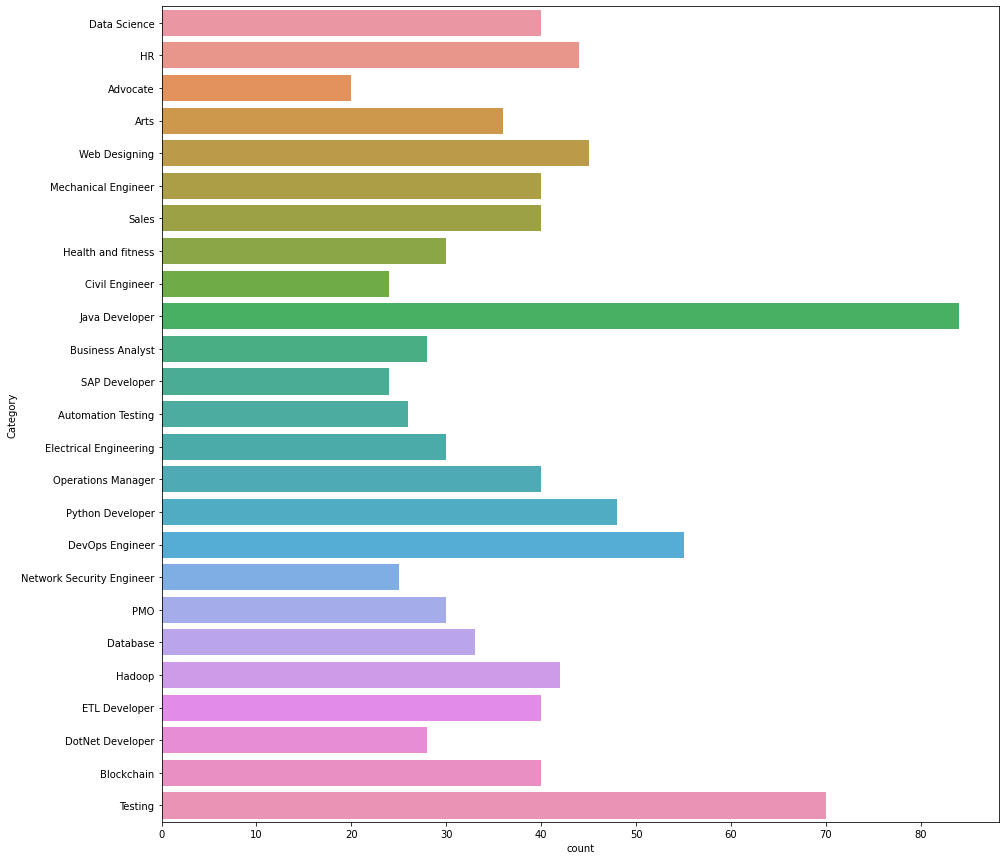

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.countplot(y="Category", data=dataset)

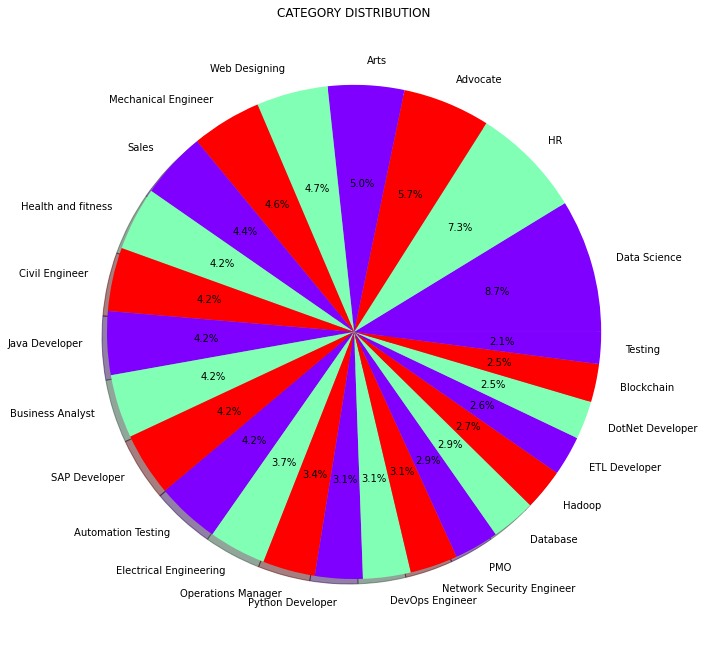

In [ ]:
from matplotlib.gridspec import GridSpec

targetCounts = dataset['Category'].value_counts()
targetLabels  = dataset['Category'].unique()
# # Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0,1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import string 

In [ ]:
def clean(text):
    text = re.sub('http\S+\s*',' ',text)  #removes urls starting from http
    text = re.sub('RT|cc',' ',text)      #removes RT and cc
    text = resumeText = re.sub('#\S+', ' ',text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]',' ',text)
    text = re.sub('\s+',' ',text)  #removes extra whitespace
    
    setofstopwords = set(stopwords.words('english')+['``',"''"])
    
    setofwords = nltk.word_tokenize(text)
    newtext = ""
    for word in setofwords:
        if word not in setofstopwords and word not in string.punctuation:
            newtext+=" "+word
    return newtext

In [ ]:
dataset['cleaned'] = dataset['Resume'].apply(lambda x: clean(x))
dataset['cleaned'][0]

LookupError: ignored

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


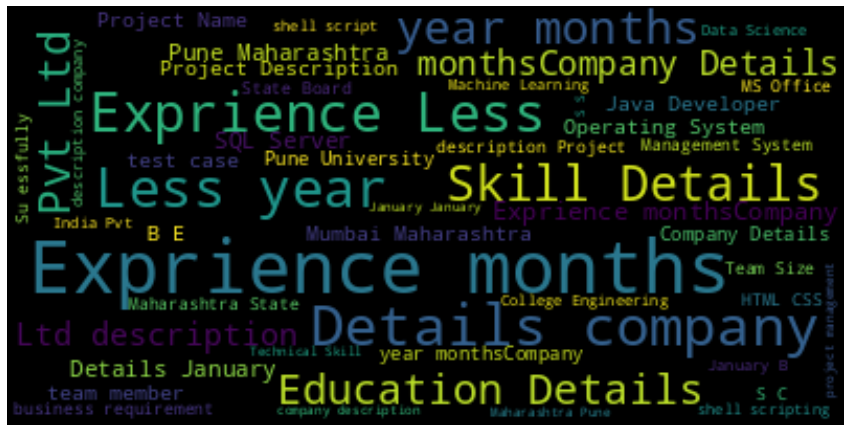

In [ ]:

from wordcloud import WordCloud

Sentences = dataset['cleaned'].values
cleanedsentences = ""
totalWords =[]
for sentence in Sentences:
    cleanedsentences+=sentence
    totalWords+=nltk.word_tokenize(sentence)
    
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedsentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


In [ ]:
dataset['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
textdata = dataset['cleaned'].values
target = dataset['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(textdata)
features = word_vectorizer.transform(textdata)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [ ]:
model1 = OneVsRestClassifier(KNeighborsClassifier())
model2 = SVC()
model3 = OneVsRestClassifier(MultinomialNB())

In [ ]:
model1.fit(X_train, y_train)
prediction1 = model1.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model1.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model1.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set: 0.95


In [ ]:

param_grid = {'C':[0.1,0.2,0.5,1.0,2.0,5.0,10.0,20.0,50.0,100.0,200.0],
             'gamma':[1,0.1,0.01,0.001],
             'kernel':['rbf','poly','sigmoid']}

grid = GridSearchCV(model2,param_grid)
grid.fit(X_train, y_train)

print('Parameters for best SVC estimator:',grid.best_estimator_)
prediction2 = grid.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.2f}'.format(grid.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set: {:.2f}'.format(grid.score(X_test, y_test)))

Parameters for best SVC estimator: SVC(C=2.0, gamma=1, kernel='sigmoid')
Accuracy of Support Vector Classifier on training set: 1.00
Accuracy of Support Vector Classifier on test set: 1.00


In [ ]:

model3.fit(X_train,y_train)
prediction = model3.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(model3.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(model3.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (model3, metrics.classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.97

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        10
          12       1.00      0.80      0.89        15
          13       1.00      1.00      1.0